In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = 10  # Mapping parameter #1
B = 1.1 # Mapping parameter #2
N = 1000000 # Number of test samples over which to compute the stdev

p = 100 / (1000 * 1000)  # Win probability for individual ticket (i.e. number of rewards / number of tickets sold)
x_min, x_max = 1, 10000  # Range of expected winning tickets for which to compute the standard deviation

def mapf(x):
    return A * x**B

def mapf_inverse(x):
    return (x / A)**(1 / B)

x_pts = np.geomspace(x_min, x_max, 20)
sigma_uniform_pts, sigma_mapped_pts = [], []

for x in x_pts:
    x_uniform = np.random.binomial(x / p, p, size=N)
    sigma_uniform = np.std(x_uniform)
    sigma_uniform_pts.append(sigma_uniform)
    
    x_mapped = np.random.binomial(mapf(x) / p, p, size=N)
    sigma_mapped = np.std(mapf_inverse(x_mapped))
    sigma_mapped_pts.append(sigma_mapped)

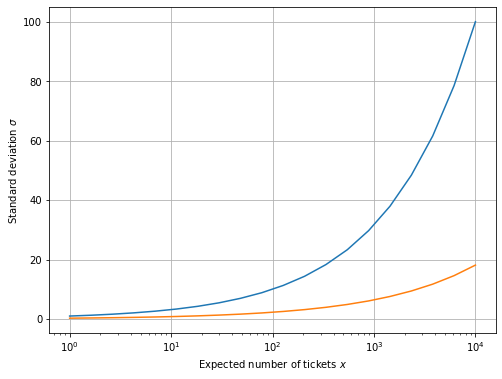

In [4]:
fig, axis = plt.subplots(1, 1, figsize=(8,6))
axis.plot(x_pts, sigma_uniform_pts)
axis.plot(x_pts, sigma_mapped_pts)
axis.grid()

axis.set_xscale('log')
#axis.set_yscale('log')

axis.set_xlabel(r'Expected number of tickets $x$')
axis.set_ylabel(r'Standard deviation $\sigma$')

plt.show()